In [124]:
#---- User input-----#
#--------------------#

# Experimental values for input
# n=2.46
# n2=1.25*10^-18 m^2/V^2
# wavelength=1.53um
# slab thickness = wavelength
# input amplitude a=1.927*10^8 V/m, time averaged

sz = 10          # size of cell in z direction
amp = 1*10**3*1.0901      # amplitude of source
dpml = 1        # PML thickness
k = 4.1*10**-7        # Kerr susceptibility
n=2.46         # index
time_set=9000         # simulation run time
resolution = 90

#----Continuous Source
frq_cs=1/1.53          # meep frequency
cs_width=100          #the inverse of the exponential rate at which the current turns off and on

# frequency range for monitors
nfreq = 1
fmin = 1/1.53
fmax = 1/1.53

# Geometry
d_s=1.53# slab thickness
pos_s=0# slab position

-----------
Initializing structure...
time for choose_chunkdivision = 5.29289e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 10 with resolution 90
time for set_epsilon = 0.000221968 s
-----------


FloatProgress(value=0.0, description='0% done ', max=9000.0)

Meep progress: 377.58333333333337/9000.0 = 4.2% done in 4.0s, 91.3s to go
on time step 68052 (time=378.067), 5.87819e-05 s/step
Meep progress: 757.8444444444444/9000.0 = 8.4% done in 8.0s, 87.0s to go
on time step 136509 (time=758.383), 5.84315e-05 s/step
Meep progress: 1134.7111111111112/9000.0 = 12.6% done in 12.0s, 83.2s to go
on time step 204350 (time=1135.28), 5.89619e-05 s/step
Meep progress: 1521.2277777777779/9000.0 = 16.9% done in 16.0s, 78.7s to go
on time step 273933 (time=1521.85), 5.74858e-05 s/step
Meep progress: 1908.9611111111112/9000.0 = 21.2% done in 20.0s, 74.3s to go
on time step 343740 (time=1909.67), 5.7301e-05 s/step
Meep progress: 2299.8222222222225/9000.0 = 25.6% done in 24.0s, 69.9s to go
on time step 414107 (time=2300.59), 5.68455e-05 s/step
Meep progress: 2689.4500000000003/9000.0 = 29.9% done in 28.0s, 65.7s to go
on time step 484249 (time=2690.27), 5.70274e-05 s/step
Meep progress: 3081.8944444444446/9000.0 = 34.2% done in 32.0s, 61.4s to go
on time step 5

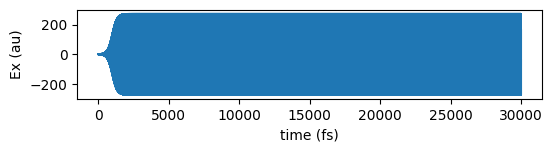

In [125]:
# Reference simulation (source only)

import meep as mp
import numpy as np
import matplotlib.pyplot as plt

geometry = [mp.Block(center=mp.Vector3(0,0,pos_s),size=mp.Vector3(0,0,d_s), material=mp.Medium(index=n, chi3=[] ))]
geometry2 = [mp.Block(center=mp.Vector3(0,0,pos_s),size=mp.Vector3(0,0,d_s), material=mp.Medium(index=n, chi3=k ))]

dimensions = 1
cell = mp.Vector3(0, 0, sz)
pml_layers = mp.PML(dpml)
default_material = mp.Medium(index=1, chi3=[])

sources = mp.Source(mp.ContinuousSource(frq_cs, width=cs_width), component=mp.Ex,
					center=mp.Vector3(0, 0, -0.5*sz + dpml), amplitude=amp)

sim = mp.Simulation(cell_size=cell,
					geometry=[],
					sources=[sources],
					boundary_layers=[pml_layers],
					default_material=default_material,
					resolution=resolution,
					dimensions=dimensions)

trans_ref = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))
refl_ref = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))

#         Define E field monitor
dx=1/resolution
dt=0.5*dx
tm_val_x=[]
def get_dot(sim):	
	tm_val_x.append(sim.get_array(size=mp.Vector3(), center=mp.Vector3(0,0,-0.5*sz + dpml), component=mp.Ex))
#        #        #        #    

sim.run(mp.at_every(dt,get_dot),until=time_set)


#         plot results
tm_val_x=np.array(tm_val_x)
max_ind=np.size(tm_val_x)
c=3*10**8 # m/s speed of light
mon_t=[]
for n in np.arange(0,max_ind,1):
	mon_tmp=(dt+dt*n)*(10**-6/c)*10**15 # s
	mon_t.append(mon_tmp)

figure2=plt.figure(dpi=100)
ax1=plt.subplot(3, 1, 1)
plt.plot(mon_t,tm_val_x)
plt.xlabel('time (fs)')
plt.ylabel('Ex (au)') 

#         Save reference data
freqs_ref = mp.get_flux_freqs(trans_ref)
plt_range_ref=1/np.asarray(freqs_ref)
box_x1_trans_ref = mp.get_fluxes(trans_ref)
flux_ref=np.asarray(box_x1_trans_ref)

#         Print amplitude and intensity of field
print("E_0=",np.amax(tm_val_x),"V/um")
print("E_0=",np.amax(tm_val_x)/(10**-6),"V/m")
print("I=",np.amax(np.abs(tm_val_x))**2/(2*120*np.pi),"W/um^2")

-----------
Initializing structure...
time for choose_chunkdivision = 5.91278e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 10 with resolution 90
     block, center = (0,0,0)
          size (0,0,1.53)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.0516,6.0516,6.0516)
time for set_epsilon = 0.000270844 s
-----------


FloatProgress(value=0.0, description='0% done ', max=9000.0)

Meep progress: 387.5388888888889/9000.0 = 4.3% done in 4.0s, 88.9s to go
on time step 69820 (time=387.889), 5.72916e-05 s/step
Meep progress: 775.4222222222222/9000.0 = 8.6% done in 8.0s, 84.9s to go
on time step 139653 (time=775.85), 5.72801e-05 s/step
Meep progress: 1164.15/9000.0 = 12.9% done in 12.0s, 80.8s to go
on time step 209634 (time=1164.63), 5.71588e-05 s/step
Meep progress: 1554.1555555555556/9000.0 = 17.3% done in 16.0s, 76.7s to go
on time step 279841 (time=1554.67), 5.69745e-05 s/step
Meep progress: 1943.5555555555557/9000.0 = 21.6% done in 20.0s, 72.6s to go
on time step 349947 (time=1944.15), 5.70572e-05 s/step
Meep progress: 2318.7833333333333/9000.0 = 25.8% done in 24.0s, 69.2s to go
on time step 417494 (time=2319.41), 5.9219e-05 s/step
Meep progress: 2711.1222222222223/9000.0 = 30.1% done in 28.0s, 65.0s to go
on time step 488124 (time=2711.8), 5.66337e-05 s/step
Meep progress: 3103.427777777778/9000.0 = 34.5% done in 32.0s, 60.8s to go
on time step 558750 (time=310

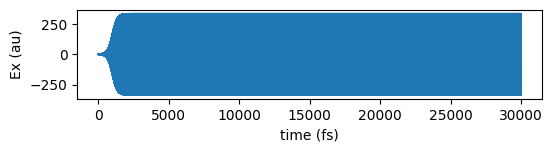

In [126]:
# 1d simulation of a plane wave propagating through a linear slab
sim.reset_meep()

sim = mp.Simulation(cell_size=cell,
					geometry=geometry,
					sources=[sources],
					boundary_layers=[pml_layers],
					default_material=default_material,
					resolution=resolution,
					dimensions=dimensions)

trans = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))
refl = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, -0.5*sz + dpml + 4)))

tm_val_x=[]
sim.run(mp.at_every(dt,get_dot),until=time_set)


#         plot results
freqs_lin = mp.get_flux_freqs(trans)
plt_range_lin=1/np.asarray(freqs_lin)
box_x1_trans_lin = mp.get_fluxes(trans)
flux_lin=np.asarray(box_x1_trans_lin)
box_x1_refl_lin = mp.get_fluxes(refl)
flux_refl_lin=np.asarray(box_x1_refl_lin)

tm_val_x=np.array(tm_val_x)
max_ind=np.size(tm_val_x)
c=3*10**8 # m/s speed of light
mon_t=[]
for n in np.arange(0,max_ind,1):
	mon_tmp=(dt+dt*n)*(10**-6/c)*10**15 # s
	mon_t.append(mon_tmp)

figure2=plt.figure(dpi=100)
ax1=plt.subplot(3, 1, 1)
plt.plot(mon_t,tm_val_x)
plt.xlabel('time (fs)')
plt.ylabel('Ex (au)') 

#         Print amplitude and intensity of field
print("E_0=",np.amax(tm_val_x),"V/um")
print("E_0=",np.amax(tm_val_x)/(10**-6),"V/m")
print("I=",np.amax(np.abs(tm_val_x))**2/(2*120*np.pi),"W/um^2")

-----------
Initializing structure...
time for choose_chunkdivision = 5.4121e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 10 with resolution 90
     block, center = (0,0,0)
          size (0,0,1.53)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.0516,6.0516,6.0516)
time for set_epsilon = 0.000262022 s
-----------


FloatProgress(value=0.0, description='0% done ', max=9000.0)

Meep progress: 379.1/9000.0 = 4.2% done in 4.0s, 91.0s to go
on time step 68345 (time=379.694), 5.85266e-05 s/step
Meep progress: 758.4777777777778/9000.0 = 8.4% done in 8.0s, 86.9s to go
on time step 136640 (time=759.111), 5.85697e-05 s/step
Meep progress: 1142.388888888889/9000.0 = 12.7% done in 12.0s, 82.5s to go
on time step 205756 (time=1143.09), 5.78749e-05 s/step
Meep progress: 1524.3666666666668/9000.0 = 16.9% done in 16.0s, 78.5s to go
on time step 274524 (time=1525.13), 5.81671e-05 s/step
Meep progress: 1909.4388888888889/9000.0 = 21.2% done in 20.0s, 74.3s to go
on time step 343841 (time=1910.23), 5.77066e-05 s/step
Meep progress: 2293.6111111111113/9000.0 = 25.5% done in 24.0s, 70.2s to go
on time step 413005 (time=2294.47), 5.78337e-05 s/step
Meep progress: 2678.8166666666666/9000.0 = 29.8% done in 28.0s, 66.1s to go
on time step 482352 (time=2679.73), 5.76814e-05 s/step
Meep progress: 3064.677777777778/9000.0 = 34.1% done in 32.0s, 62.0s to go
on time step 551818 (time=30

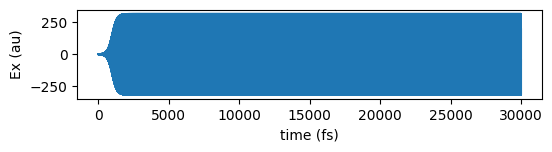

In [127]:
# 1d simulation of a plane wave propagating through a Kerr medium
sim.reset_meep()


#geometry = [mp.Block(center=mp.Vector3(0,0,(sz-dpml)/4),size=mp.Vector3(0,0,(sz-dpml)/2), material=mp.Medium(index=n, chi3=k ))]

sim = mp.Simulation(cell_size=cell,
					geometry=geometry2,
					sources=[sources],
					boundary_layers=[pml_layers],
					default_material=default_material,
					resolution=resolution,
					dimensions=dimensions)

trans = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))
refl = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, -0.5*sz + dpml + 4)))

tm_val_x=[]
sim.run(mp.at_every(dt,get_dot),until=time_set)

#         plot results
tm_val_x=np.array(tm_val_x)
max_ind=np.size(tm_val_x)
c=3*10**8 # m/s speed of light
mon_t=[]
for n in np.arange(0,max_ind,1):
	mon_tmp=(dt+dt*n)*(10**-6/c)*10**15 # s
	mon_t.append(mon_tmp)

figure2=plt.figure(dpi=100)
ax1=plt.subplot(3, 1, 1)
plt.plot(mon_t,tm_val_x)
plt.xlabel('time (fs)')
plt.ylabel('Ex (au)') 

#         Print amplitude and intensity of field
print("E_0=",np.amax(tm_val_x),"V/um")
print("E_0=",np.amax(tm_val_x)/(10**-6),"V/m")
print("I=",np.amax(np.abs(tm_val_x))**2/(2*120*np.pi),"W/um^2")

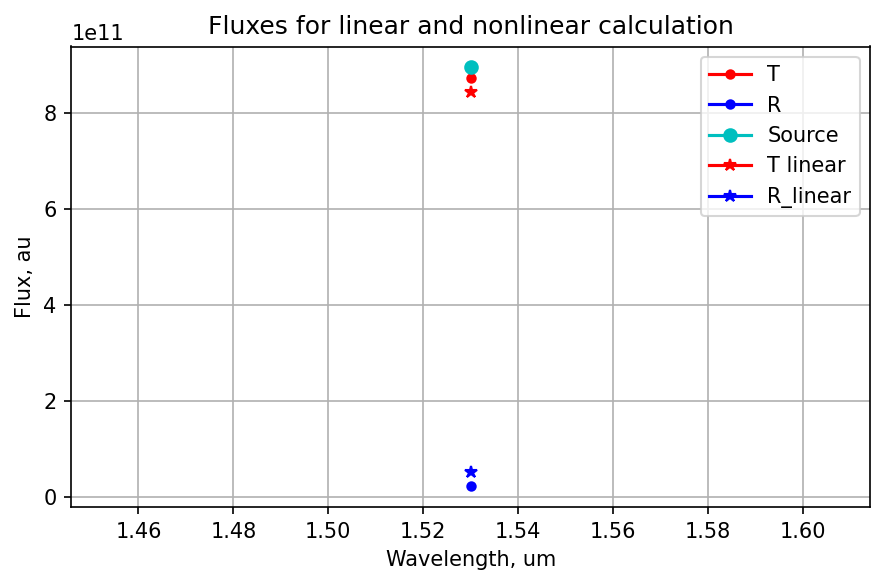

In [128]:
#         plot fluxes
freqs = mp.get_flux_freqs(trans)
plt_range=1/np.asarray(freqs)
box_x1_trans = mp.get_fluxes(trans)
flux=np.asarray(box_x1_trans)
box_x1_refl = mp.get_fluxes(refl)
flux_refl=np.asarray(box_x1_refl)
plt.figure(dpi=150)
plt.plot(plt_range_ref,flux,'ro-',label='T',markersize=4)
plt.plot(plt_range_ref,-flux_refl+flux_ref,'bo-',label='R',markersize=4)
plt.plot(plt_range_ref,flux_ref,'co-',label='Source')
plt.plot(plt_range_ref,flux_lin,'r*-',label='T linear')
plt.plot(plt_range_ref,-flux_refl_lin+flux_ref,'b*-',label='R_linear')
plt.grid(True,which="both",ls="-")
plt.xlabel('Wavelength, um')
plt.ylabel('Flux, au')
plt.legend(loc='upper right')
plt.title('Fluxes for linear and nonlinear calculation')
plt.tight_layout()

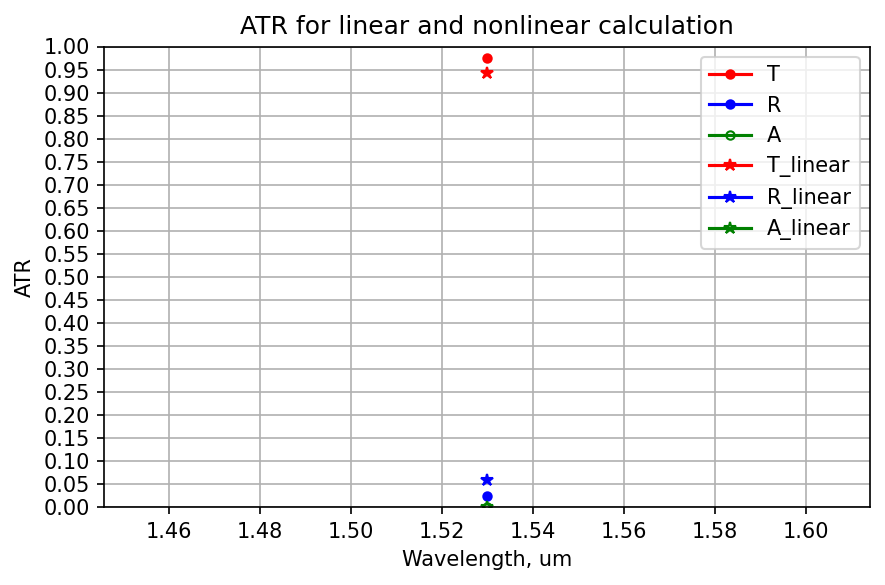

In [129]:
#         plot ATR
plt.figure(dpi=150)
plt.plot(plt_range_ref,flux/flux_ref,'ro-',label='T',markersize=4)
plt.plot(plt_range_ref,(-flux_refl+flux_ref)/flux_ref,'bo-',label='R',markersize=4)
plt.plot(plt_range_ref,1-(-flux_refl+flux_ref)/flux_ref-flux/flux_ref,'go-',label='A',markersize=4, markerfacecolor='none')
plt.plot(plt_range_ref,flux_lin/flux_ref,'r*-',label='T_linear')
plt.plot(plt_range_ref,(-flux_refl_lin+flux_ref)/flux_ref,'b*-',label='R_linear')
plt.plot(plt_range_ref,1-(-flux_refl_lin+flux_ref)/flux_ref-flux_lin/flux_ref,'g*-',label='A_linear', markerfacecolor='none')
plt.grid(True,which="both",ls="-")
plt.yticks([-0.05,0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95, 1])
plt.xlabel('Wavelength, um')
plt.ylabel('ATR')
plt.legend(loc='upper right')
#plt.xlim([0.85, 5])
plt.ylim([-0, 1])
plt.title('ATR for linear and nonlinear calculation')
plt.tight_layout()
np.savetxt('ATR.txt', (plt_range_ref,flux/flux_ref,1-flux_refl/flux_ref,1-(1-flux_refl/flux_ref)-flux/flux_ref), delimiter=',')